In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Capital Bike Share DataFrames
df_st = pd.read_csv('station_info.csv')
df_wk = pd.read_csv('last_week.csv')

In [4]:
print(df_st.shape)
print(df_wk.shape)

(647, 3)
(57934, 14)


In [5]:
df_wk.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name    4991
start_station_id      4991
end_station_name      5422
end_station_id        5422
start_lat                0
start_lng                0
end_lat                 86
end_lng                 86
member_casual            0
day                      0
dtype: int64

In [6]:
df_wk_a= df_wk.dropna()

In [7]:
df_wk_a.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
day                   0
dtype: int64

In [8]:
df_st.head()

,Unnamed: 0,Name,Capacity
0,0,Eads St & 15th St S,15
1,1,18th St & S Eads St,11
2,2,Crystal Dr & 20th St S,17
3,3,Crystal Dr & 15th St S,16
4,4,Aurora Hills Cmty Ctr / 18th St & S Hayes St,12


In [35]:
#g= df_st.drop(['Unnamed: 0'], axis=1)
#g

In [ ]:
#df_st_c = g.rename(columns={'Name':'start_station_name'})
#df_st_c

In [38]:
df_st[(df_st['Name']=='21st & I St NW')]

,Unnamed: 0,Name,Capacity
25,25,21st & I St NW,35


In [39]:
df_wk_a[df_wk_a['start_station_name']=='21st & I St NW'].count()

ride_id               119
rideable_type         119
started_at            119
ended_at              119
start_station_name    119
start_station_id      119
end_station_name      119
end_station_id        119
start_lat             119
start_lng             119
end_lat               119
end_lng               119
member_casual         119
day                   119
DAY                   119
weekday               119
month                 119
yr                    119
dtype: int64

In [12]:
df_wk_a['day'].str.replace("-","").astype(int)

0        20210625
1        20210622
2        20210622
3        20210626
4        20210622
           ...   
57929    20210623
57930    20210625
57931    20210625
57932    20210625
57933    20210621
Name: day, Length: 50625, dtype: int64

In [14]:
df_wk_a.day = pd.to_datetime(df_wk_a.day)
df_wk_a.loc[:,'DAY'] = df_wk_a.day.dt.day
df_wk_a.loc[:,'weekday'] = df_wk_a.day.dt.day_name()
df_wk_a.loc[:,'month'] = df_wk_a.day.dt.month_name()
df_wk_a.loc[:,'yr'] = df_wk_a.day.dt.year;

In [15]:
df_wk_a.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,DAY,weekday,month,yr
0,B3FA23181ADC06FE,docked_bike,2021-06-25 00:51:53,2021-06-25 01:51:40,Georgia Ave & Spring St,32035.0,New Hampshire & Kirklynn Ave,32061.0,38.999388,-77.031555,38.988101,-76.988422,casual,2021-06-25,25,Friday,June,2021
1,6A153F2AD6700EE1,classic_bike,2021-06-22 06:28:23,2021-06-22 06:33:19,Merrifield Cinema & Merrifield Town Center,32235.0,Merrilee Dr & Lauren Elizabeth Lane,32234.0,38.870093,-77.229970,38.879355,-77.230681,casual,2021-06-22,22,Tuesday,June,2021
2,7265E4C759F1EDC0,classic_bike,2021-06-22 22:27:28,2021-06-22 22:30:39,Columbia & Ontario Rd NW,31296.0,15th & Harvard St NW,31103.0,38.924088,-77.040787,38.926124,-77.035421,member,2021-06-22,22,Tuesday,June,2021
3,18FB278BE5F2B0C7,docked_bike,2021-06-26 20:49:57,2021-06-26 22:44:29,1st & H St NW,31638.0,1st & H St NW,31638.0,38.900358,-77.012108,38.900358,-77.012108,casual,2021-06-26,26,Saturday,June,2021
4,294E78FE02E1C65F,classic_bike,2021-06-22 20:35:41,2021-06-22 20:45:27,5th & K St NW,31600.0,17th St & Massachusetts Ave NW,31267.0,38.903040,-77.019027,38.908142,-77.038359,member,2021-06-22,22,Tuesday,June,2021


In [17]:
df_wk_a[(df_wk_a['start_station_name']=='Lincoln Memorial') & (df_wk_a['day']=='2021-06-25') ].count()['ride_id']

140

<AxesSubplot:>

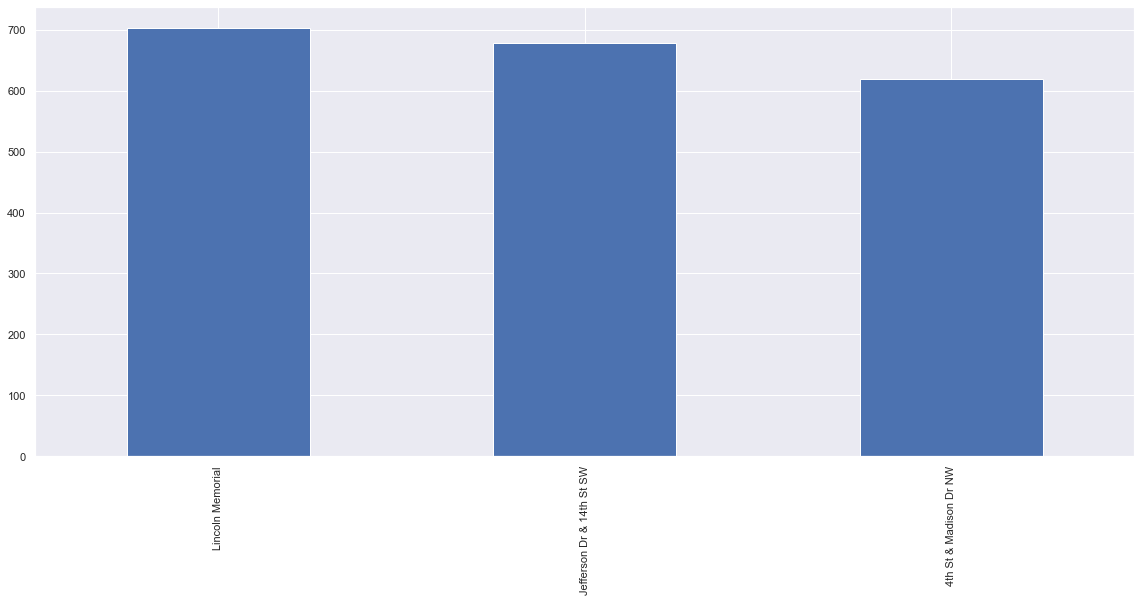

In [115]:
df_wk_a['start_station_name'].value_counts()[:3].plot(kind='bar')

<AxesSubplot:>

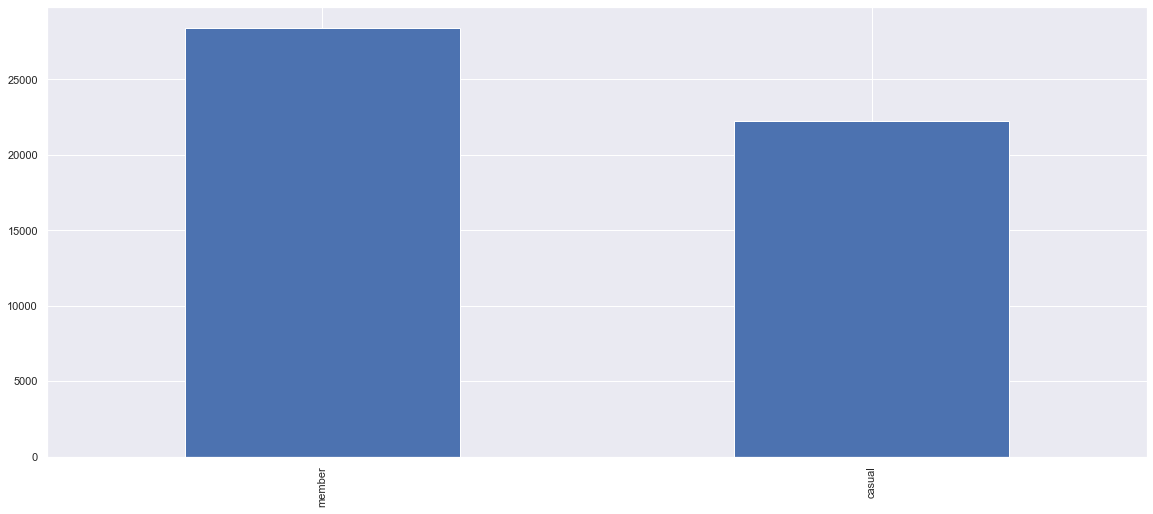

In [116]:
df_wk_a['member_casual'].value_counts().plot(kind='bar')

In [46]:
count_wk_id= pd.DataFrame(df_wk_a.groupby(['start_station_name']).count()['ride_id'])
count_wk_id

,ride_id
start_station_name,
10th & E St NW,174
10th & Florida Ave NW,239
10th & G St NW,111
10th & K St NW,252
10th & Monroe St NE,49
...,...
Wisconsin Ave & O St NW,156
Woodglen Dr & Executive Blvd,15
Woodley Park Metro / Calvert St & Connecticut Ave NW,196


In [145]:
df_merge = pd.merge(count_wk_id, df_st, how='left', left_on='start_station_name', right_on='Name')
df_merge

,ride_id,Unnamed: 0,Name,Capacity
0,174,190.0,10th & E St NW,15.0
1,239,263.0,10th & Florida Ave NW,19.0
2,111,318.0,10th & G St NW,23.0
3,252,151.0,10th & K St NW,23.0
4,49,90.0,10th & Monroe St NE,15.0
...,...,...,...,...
606,156,216.0,Wisconsin Ave & O St NW,19.0
607,15,487.0,Woodglen Dr & Executive Blvd,16.0
608,196,519.0,Woodley Park Metro / Calvert St & Connecticut ...,23.0
609,44,367.0,Woodmont Ave & Strathmore St,11.0


In [146]:
#df_merge.isnull().sum()
df_merge_clean= df_merge.dropna()

In [147]:
df_merge_clean['Avg_Day'] = df_merge_clean['ride_id'].div(7)
df_merge_clean

<ipython-input-147-3c35f4029a39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_clean['Avg_Day'] = df_merge_clean['ride_id'].div(7)


,ride_id,Unnamed: 0,Name,Capacity,Avg_Day
0,174,190.0,10th & E St NW,15.0,24.857143
1,239,263.0,10th & Florida Ave NW,19.0,34.142857
2,111,318.0,10th & G St NW,23.0,15.857143
3,252,151.0,10th & K St NW,23.0,36.000000
4,49,90.0,10th & Monroe St NE,15.0,7.000000
...,...,...,...,...,...
606,156,216.0,Wisconsin Ave & O St NW,19.0,22.285714
607,15,487.0,Woodglen Dr & Executive Blvd,16.0,2.142857
608,196,519.0,Woodley Park Metro / Calvert St & Connecticut ...,23.0,28.000000
609,44,367.0,Woodmont Ave & Strathmore St,11.0,6.285714


In [148]:
a= df_merge_clean.sort_values(by=['Name'], ascending=True)
a

,ride_id,Unnamed: 0,Name,Capacity,Avg_Day
0,174,190.0,10th & E St NW,15.0,24.857143
1,239,263.0,10th & Florida Ave NW,19.0,34.142857
2,111,318.0,10th & G St NW,23.0,15.857143
3,252,151.0,10th & K St NW,23.0,36.000000
4,49,90.0,10th & Monroe St NE,15.0,7.000000
...,...,...,...,...,...
606,156,216.0,Wisconsin Ave & O St NW,19.0,22.285714
607,15,487.0,Woodglen Dr & Executive Blvd,16.0,2.142857
608,196,519.0,Woodley Park Metro / Calvert St & Connecticut ...,23.0,28.000000
609,44,367.0,Woodmont Ave & Strathmore St,11.0,6.285714


In [149]:
df_merge_clean[(df_merge_clean['Name']=='4th St & Madison Dr NW')]

,ride_id,Unnamed: 0,Name,Capacity,Avg_Day
156,619,385.0,4th St & Madison Dr NW,31.0,88.428571


In [154]:
df_merge_clean.drop('Unnamed: 0', inplace=True, axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [155]:
df_merge_clean.to_csv (r'capacity_vs_demand.csv', index = False, header=True)

No handles with labels found to put in legend.


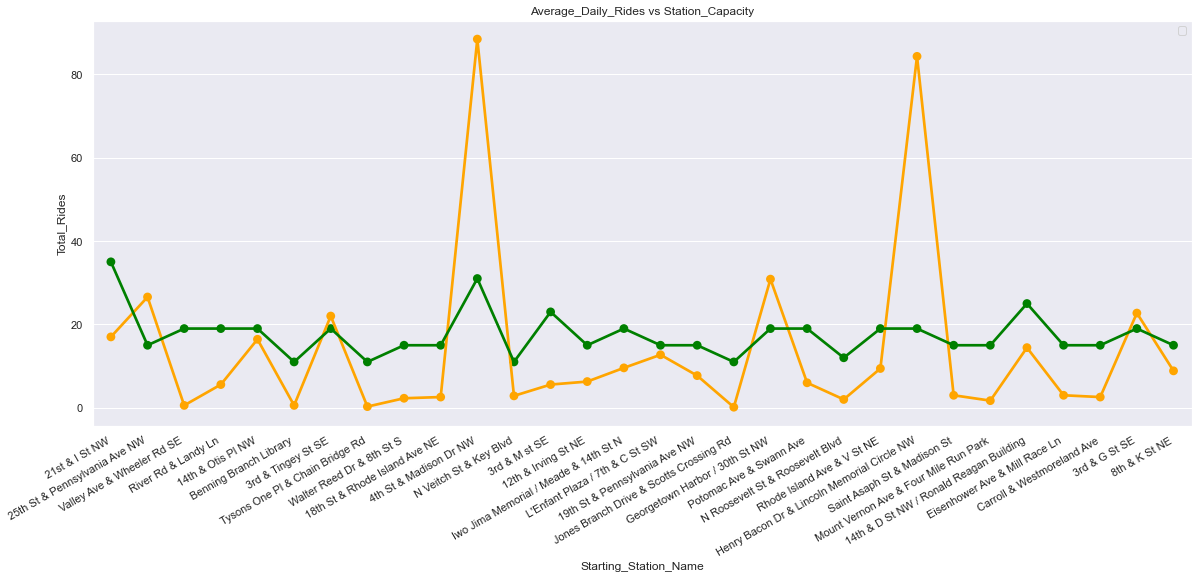

In [156]:
sns.set(rc={'figure.figsize':(19.7,8.27)})
fig, ax = plt.subplots()
sns.pointplot(data=df_merge_clean, x='Name', y='Avg_Day', order=df_merge_clean.Name.value_counts().iloc[:30].index, ax=ax, color='orange', label='Station Total Rides')

sns.pointplot(data=df_merge_clean, x='Name', y='Capacity', order=df_merge_clean.Name.value_counts().iloc[:30].index, ax=ax, color='green', label='Station Capacity')

plt.title('Average_Daily_Rides vs Station_Capacity')
plt.ylabel('Total_Rides')
plt.xlabel('Starting_Station_Name')
plt.legend()

plt.gcf().autofmt_xdate()

plt.show()